This Jupyter Notebook performs a comprehensive analysis of 911 call data. Below is a summary of the steps and analyses conducted:

1. **Imports and Setup**:
    - Essential libraries such as `pandas`, `matplotlib.pyplot`, `seaborn`, and custom modules from the `src` directory are imported.

2. **Data Loading**:
    - The dataset is loaded from a CSV file located at `/workspaces/911_quiz/911.csv` using a custom `load_data` function.

3. **Data Exploration**:
    - Basic information about the dataset is displayed using `df.info()` and `df.head()`.
    - The dataset is explored further using the `explore_data` function, which provides insights into the data.
    - Top 5 zip codes and townships with the most 911 calls are identified using `top_zipcodes` and `top_townships` functions.
    - The number of unique title codes is determined using the `unique_title_codes` function.

4. **Feature Engineering**:
    - Reasons for 911 calls are extracted using the `extract_reason` function, and the most common reasons are identified.
    - Time-related features are extracted using the `extract_time_features` function.

5. **Visualizations**:
    - Various visualizations are created to understand the data better:
      - Calls by reason using `plot_calls_by_reason`.
      - Calls by day using `plot_calls_by_day`.
      - Monthly distribution of calls with a count plot.
      - Total 911 calls per month and a linear fit to observe trends using `plot_calls_per_month`.
      - Total 911 calls per day and per reason.
      - Heatmap showing the number of calls at each hour vs. days of the week using `plot_heatmap`.
      - Clustermap of calls by hour and day of the week.

6. **Summary of Key Variables**:
    - `byMonth`: DataFrame showing the count of various columns grouped by month.
    - `calls_per_day`: Series showing the total number of calls per day.
    - `dayHour`: DataFrame showing the count of calls by hour and day of the week.
    - `df`: Original DataFrame containing the 911 call data.
    - `df_reason`: DataFrame with an additional column for the reason of the call.
    - `df_time_feature`: DataFrame with additional time-related features.
    - `most_common_reason`: Series showing the count of the most common reasons for 911 calls.
    - `reason`: String indicating a specific reason for filtering the data.

This notebook provides a detailed analysis of 911 call data, including data loading, exploration, feature engineering, and various visualizations to uncover patterns and trends in the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import sys
print(sys.path)

['/usr/local/python/3.11.11/lib/python311.zip', '/usr/local/python/3.11.11/lib/python3.11', '/usr/local/python/3.11.11/lib/python3.11/lib-dynload', '', '/usr/local/python/3.11.11/lib/python3.11/site-packages', '/workspaces/911_quiz/src']


In [16]:
import sys
sys.path.append('/workspaces/911_quiz/src')

# Importing functions from src directory
from data_loader import load_data
from data_exploration import explore_data, top_zipcodes, top_townships, unique_title_codes
from feature_engineering import extract_reason, extract_time_features
from visualization import plot_calls_by_reason, plot_calls_by_day, plot_calls_per_month, plot_heatmap

In [17]:
# Load dataset
file_path = "/workspaces/911_quiz/911.csv"
df = load_data(file_path)

In [18]:
# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


(None,
          lat        lng                                               desc  \
 0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
 1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
 2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
 3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
 4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
 
        zip                    title            timeStamp                twp  \
 0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
 1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
 2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
 3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
 4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   
 
                          addr  e  

In [19]:
# Exploring the dataset
explore_data(df)
print("Top 5 Zip Codes:", top_zipcodes(df))

Number of entries: 99492
Number of features: 9
Available features: ['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']
Top 5 Zip Codes: zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64


In [20]:
print("Top 5 Townships:", top_townships(df))

Top 5 Townships: twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


In [21]:
print("Number of Unique Title Codes:", unique_title_codes(df))

Number of Unique Title Codes: 110


In [22]:
# Feature Engineering
df_reason = extract_reason(df)
display(df_reason.head(2))

# Most common Reason for 911 calls
most_common_reason = df_reason['Reason'].value_counts()

most_common_reason


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

In [23]:
df_time_feature = extract_time_features(df)
df_time_feature

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wednesday
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wednesday
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wednesday
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wednesday


/workspaces/911_quiz/src_911_quiz/visualization.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette='viridis')


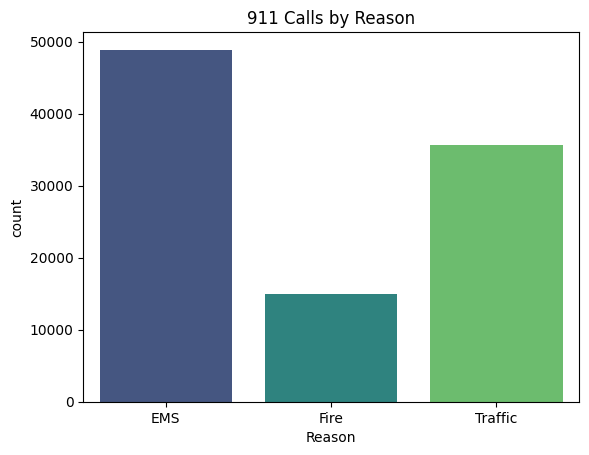

In [24]:
# Visualizations
plot_calls_by_reason(df)

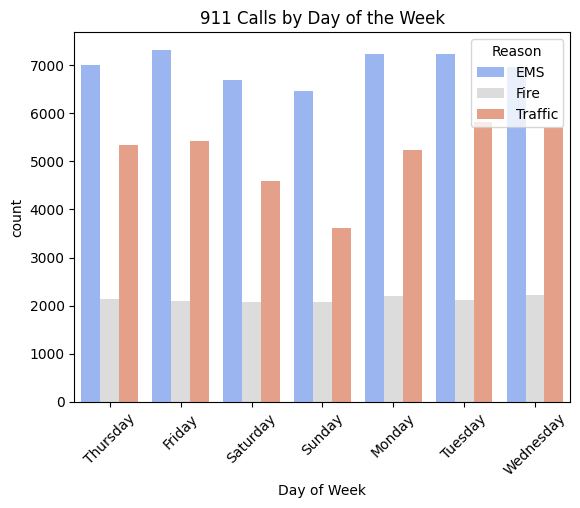

In [25]:
plot_calls_by_day(df)

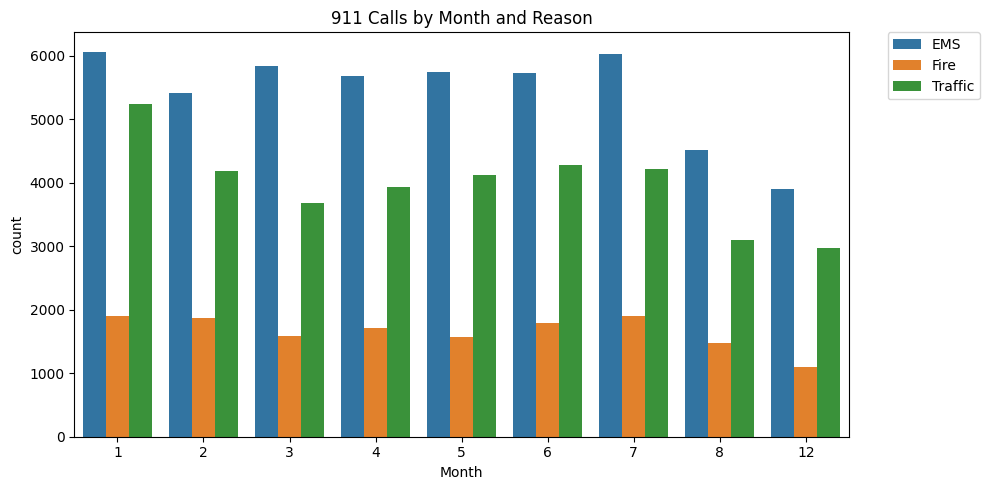

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df_reason, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('911 Calls by Month and Reason')
plt.tight_layout()
plt.show()

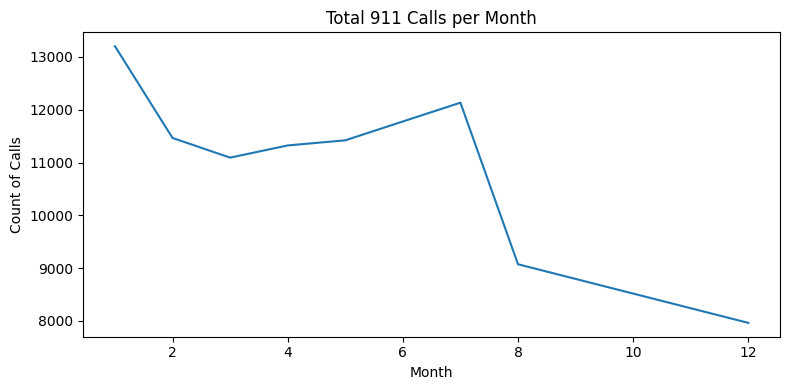

In [27]:
# Handling missing months (if any) and plot calls per month, and then group by Month and count how many entries per month
byMonth = df_reason.groupby('Month').count()

plt.figure(figsize=(8, 4))
byMonth['twp'].plot()
plt.title('Total 911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.tight_layout()
plt.show()

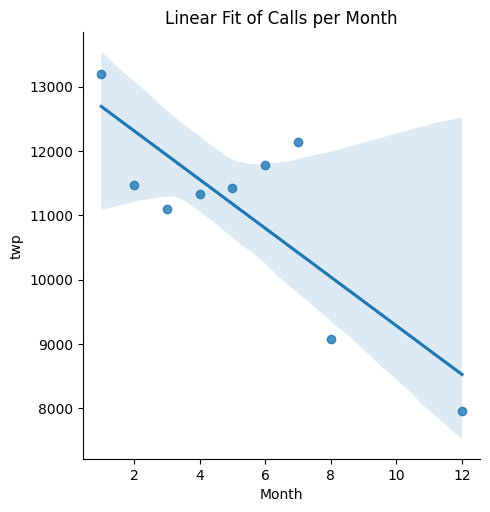

In [28]:
# Here, alinear fit on the number of calls per month, to see the trend of 911 calls
plot_calls_per_month(df)


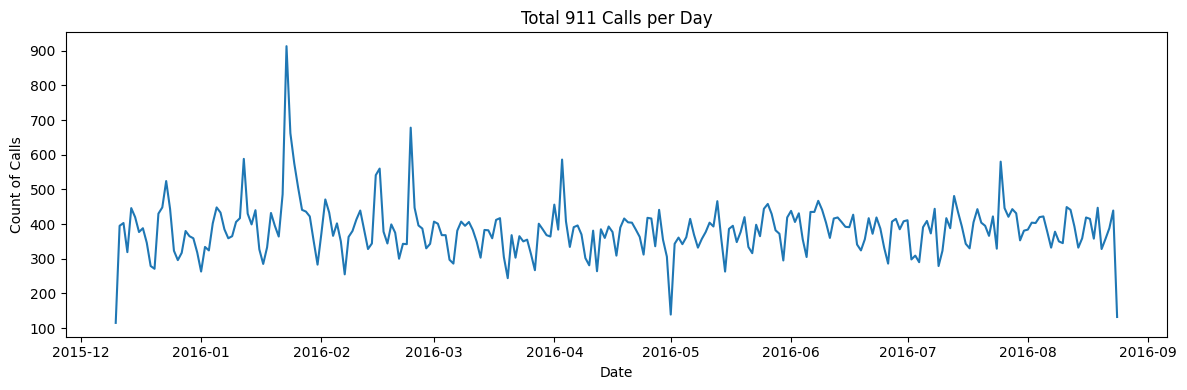

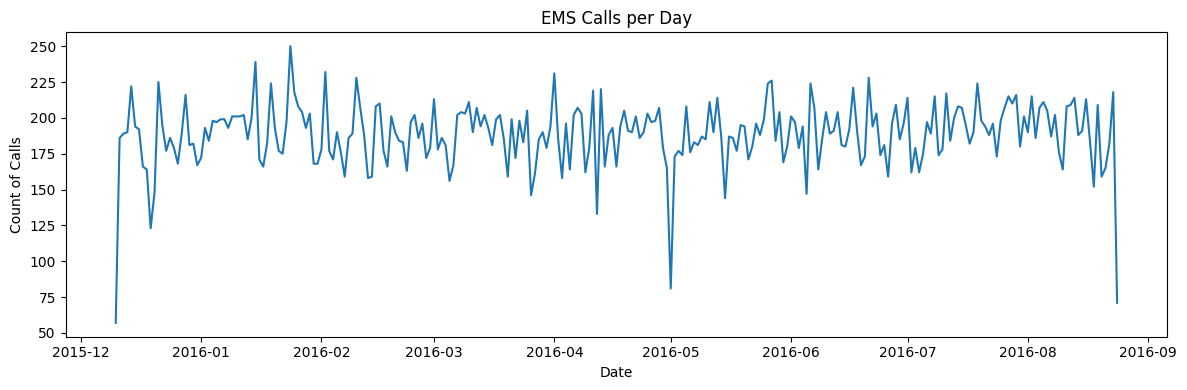

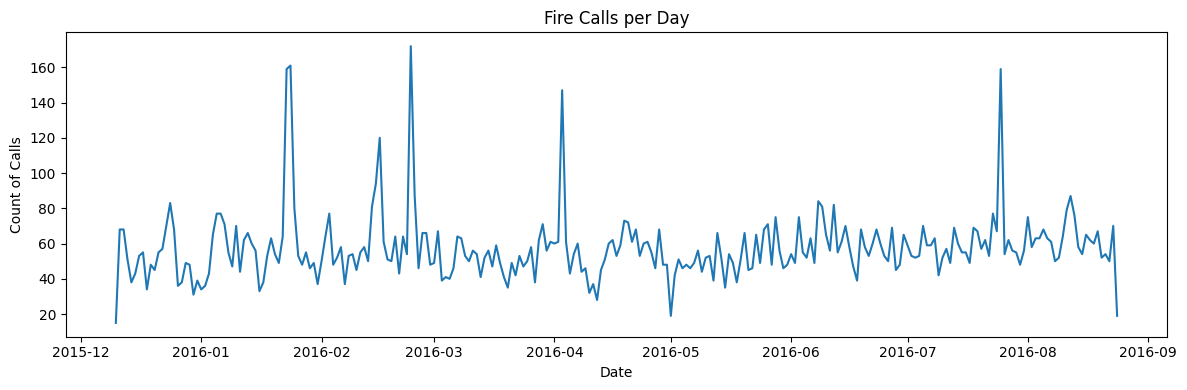

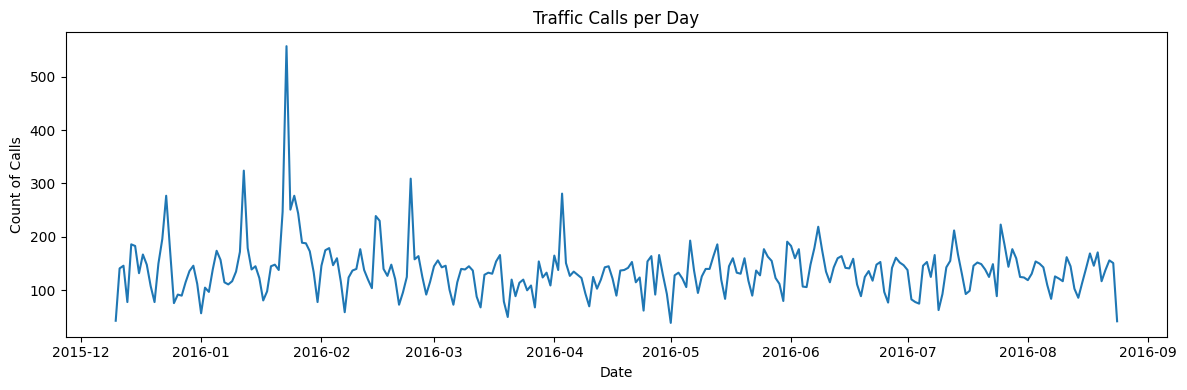

In [29]:
#Extracting just the date from the timeStamp
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

# then show the total number of calls per day
calls_per_day = df.groupby('Date').count()['twp']
plt.figure(figsize=(12, 4))
calls_per_day.plot()
plt.title('Total 911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Count of Calls')
plt.tight_layout()
plt.show()

#I will now loop through each reason and plot on its own figure
for reason in df['Reason'].unique():
    plt.figure(figsize=(12, 4))
    df[df['Reason'] == reason].groupby('Date').count()['twp'].plot()
    plt.title(f'{reason} Calls per Day')
    plt.xlabel('Date')
    plt.ylabel('Count of Calls')
    plt.tight_layout()
    plt.show()

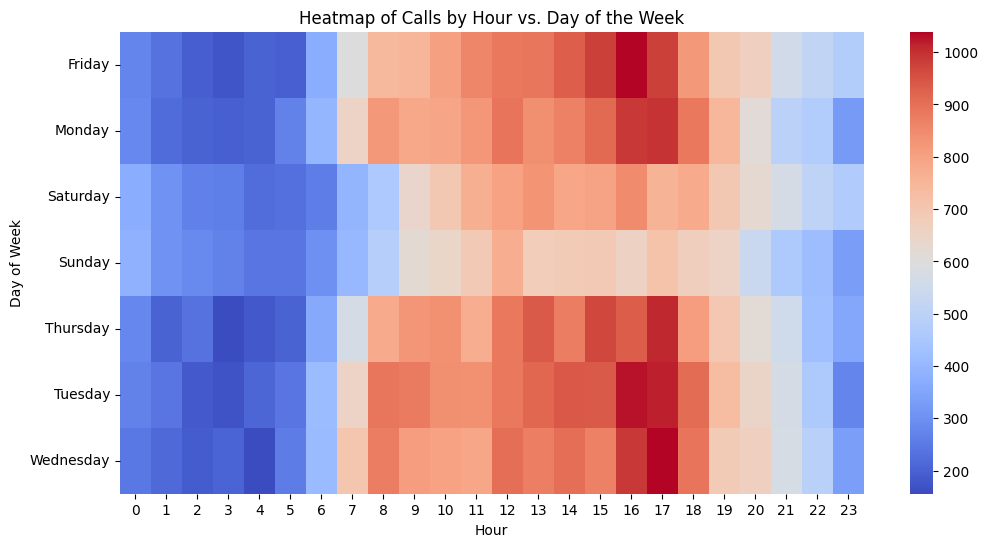

In [30]:
# created a heatmap showing the number of calls at each hour vs days of the week
plot_heatmap(df)

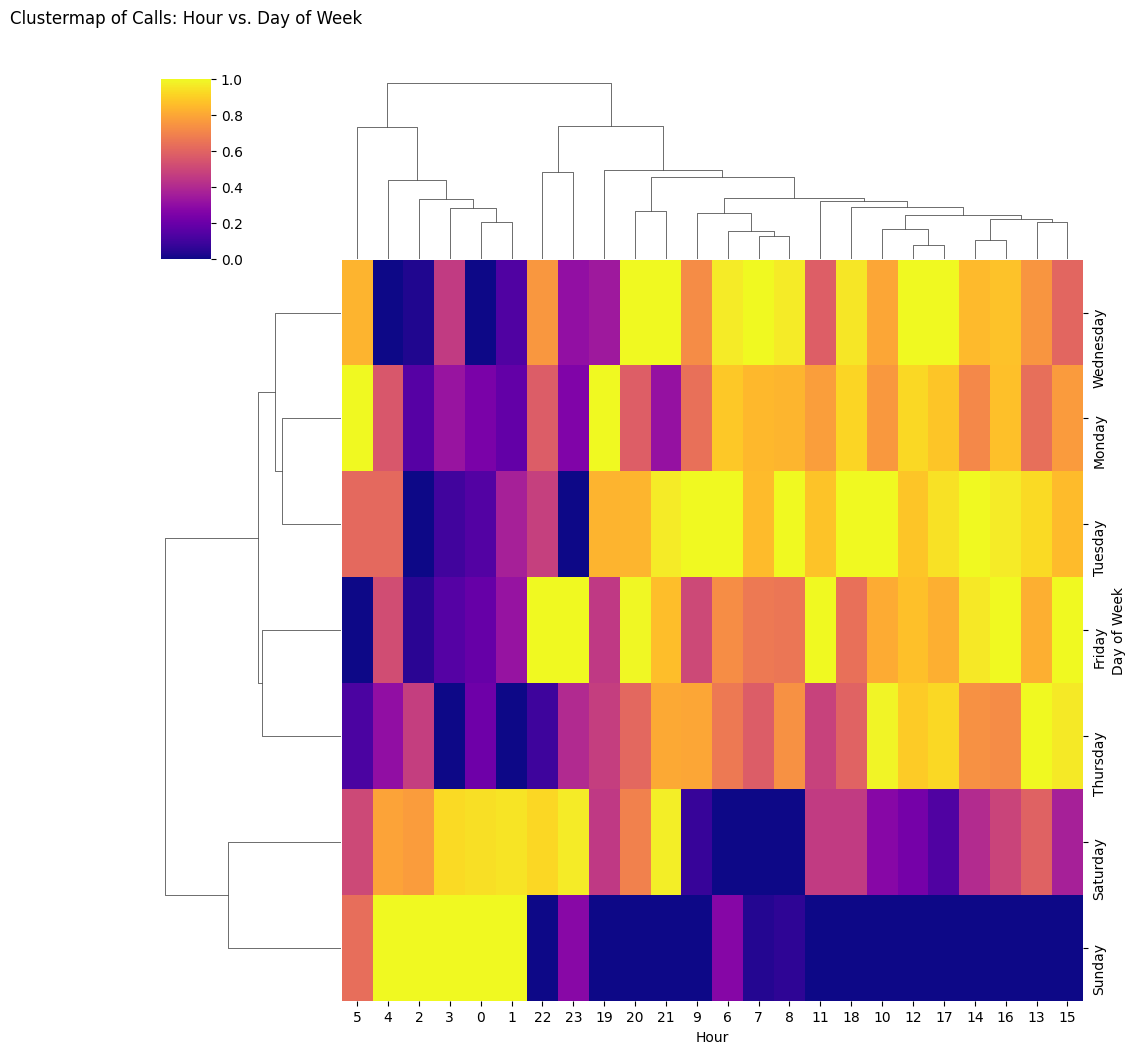

In [31]:
#Now Created a clustermap of the same data. First, I grouped by 'Day of Week' and 'Hour'
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
sns.clustermap(dayHour, cmap='plasma', standard_scale=1)
plt.title('Clustermap of Calls: Hour vs. Day of Week', pad=40)
plt.show()